In [74]:
!python --version

Python 3.13.2


In [75]:
from langchain_community.document_loaders import PyPDFLoader

pdf_file_path = './documents/income_tax.pdf'
loader = PyPDFLoader(pdf_file_path)
pages=[]
async for page in loader.alazy_load():
    pages.append(page)

In [76]:
pages[35]

Document(metadata={'producer': 'iText 2.1.7 by 1T3XT', 'creator': 'PyPDF', 'creationdate': '2025-01-10T10:55:01+09:00', 'moddate': '2025-01-10T10:55:01+09:00', 'source': './documents/income_tax.pdf', 'total_pages': 133, 'page': 35, 'page_label': '36'}, page_content='법제처                                                            36                                                       국가법령정보센터\n소득세법\n② 거주자의 퇴직소득에 대한 소득세는 다음 각 호의 순서에 따라 계산한 금액(이하 “퇴직소득 산출세액”이라 한다\n)으로 한다.<개정 2013. 1. 1., 2014. 12. 23.>\n1. 해당 과세기간의 퇴직소득과세표준에 제1항의 세율을 적용하여 계산한 금액\n2. 제1호의 금액을 12로 나눈 금액에 근속연수를 곱한 금액\n3. 삭제<2014. 12. 23.>\n[전문개정 2009. 12. 31.]\n \n           제2관 세액공제 <개정 2009. 12. 31.>\n \n제56조(배당세액공제) ① 거주자의 종합소득금액에 제17조제3항 각 호 외의 부분 단서가 적용되는 배당소득금액이 합\n산되어 있는 경우에는 같은 항 각 호 외의 부분 단서에 따라 해당 과세기간의 총수입금액에 더한 금액에 해당하는\n금액을 종합소득 산출세액에서 공제한다. <개정 2009. 12. 31.>\n② 제1항에 따른 공제를 “배당세액공제”라 한다.<개정 2009. 12. 31.>\n③ 삭제<2003. 12. 30.>\n④ 제1항을 적용할 때 배당세액공제의 대상이 되는 배당소득금액은 제14조제2항의 종합소득과세표준에 포함된 배\n당소득금액으로서 이자소득등의 종합과세기준

- Install the [py-zerox](https://www.piwheels.org/project/py-zerox/) package for data preprocessing

In [41]:
%pip install -q py-zerox

Note: you may need to restart the kernel to use updated packages.


In [42]:
from dotenv import load_dotenv

load_dotenv()



True

In [43]:
%pip install -q nest_asyncio

Note: you may need to restart the kernel to use updated packages.


In [44]:
import nest_asyncio
nest_asyncio.apply()

In [45]:
import os, shutil

# Jupyter 커널 PATH 보강
os.environ["PATH"] = "/opt/homebrew/bin:/opt/homebrew/opt/poppler/bin:" + os.environ["PATH"]

print("pdfinfo ->", shutil.which("pdfinfo"))
print("pdftoppm ->", shutil.which("pdftoppm"))


pdfinfo -> /opt/homebrew/bin/pdfinfo
pdftoppm -> /opt/homebrew/bin/pdftoppm


In [46]:
from pyzerox import zerox
import asyncio

kwargs = {}
custom_system_prompt = None

model = "gpt-4o-mini" 

async def main():
    file_path = "./documents/income_tax.pdf"
    # select_pages = None ## 전체는 None, 특정 페이지는 int 또는 list(int) 페이지 번호 (1부터 시작)
    select_pages = [1]

    output_dir = "./documents"

    result = await zerox(file_path=file_path, model=model, output_dir=output_dir,
                        custom_system_prompt=custom_system_prompt, select_pages=select_pages, **kwargs)

    return result

result = asyncio.run(main())
print(result)

ZeroxOutput(completion_time=41262.475, file_name='income_tax', input_tokens=36877, output_tokens=895, pages=[Page(content='# 소득세법\n\n[시행 2025. 1. 1.] [법률 제20615호, 2024. 12. 31., 일반개정]  \n기획재정부 (세제실세제과) 044-215-4312  \n기획재정부 (소득세제과) 044-215-4216  \n기획재정부 (유형세제과) 044-215-4233  \n기획재정부 (소득세제관리과) 044-215-4217  \n\n## 제1장 총칙  \n### 제정 2009. 12. 31.  \n\n## 제2조(정의)  \n이 법은 개인의 소득에 대하여 소득의 성격과 납세자의 부담능력 등에 따라 적정하게 과세함으로써 세부담의 형평을 도모하고 재정수입의 원활한 조달에 이바지함을 목적으로 한다.  \n[본조신설 2009. 12. 31.]  \n[종전 제1조는 제2조로 이동 <2009. 12. 31.>]  \n\n### 제2조(용어의 정의)  \n① 이 법에서 사용하는 용어의 뜻은 다음과 같다. <개정 2010. 12. 27, 2014. 12. 23, 2018. 12. 31.>  \n1. “거주자”란 국내에 주소를 두거나 183일 이상에 해당하는 거소를 두 개인을 말한다.  \n2. “비거주자”란 거주자가 아닌 개인을 말한다.  \n3. “국내법인”이란 법인세법 제2조제1호에 따른 내국법인을 말한다.  \n4. “외국법인”이란 법인세법 제2조제3호에 따른 외국법인을 말한다.  \n5. “사업자”란 사업소의 있는 거주자를 말한다.  \n6. 제1항에 따른 소득·가소득자·비거주자의 구분은 대통령령으로 정한다.  \n[본조신설 2009. 12. 31.]  \n\n## 제2조(납세의무)  \n구분  \n1. 거주자  \n2. 비거주자로서 국내원천소득(國內源泉所得)이 있는 개인  \n3. 다음 각 호의 어느 하나에 해당하는 자는 이 법에 따라 원천징수한

In [47]:
# https://github.com/Unstructured-IO: 다양한 문서 파일(PDF, Word, PowerPoint, HTML, 이미지, 이메일 등등)을 텍스트/문단 단위로 쪼개서 추출해주는 오픈소스 라이브러리
# unstructured[md]: document parser, [md] → “extra dependency
# nltk: Natural Language Toolkit (The oldest and most traditional natural language processing (NLP) library in Python)

%pip install -q "unstructured[md]" nltk

Note: you may need to restart the kernel to use updated packages.


여기까지 일단 preprocessing 해둠.

Poppler → PDF를 이미지·텍스트 블록 단위로 해체  
pyzerox → 그 텍스트를 LLM(GPT-4o/mini)에 태워서 마크다운 구조화 텍스트로 변환  
unstructured나 nltk 같은 라이브러리로 더 잘게 쪼개서 토큰화/분석 준비

In [48]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000,
    chunk_overlap=100,
    separators=["\n\n", "\n", " ", ""]
)

# 한 청크에 최대 크기 1000자 제한, 겹치는 부분 100자 이내로, 어디서 자를 지 -> separators (문단 > 줄바꿈 > 단어 > 글자)

In [49]:
from langchain_community.document_loaders import UnstructuredMarkdownLoader

markdown_path = "./documents/income_tax.md"
loader = UnstructuredMarkdownLoader(markdown_path) # 이 경로에 있는 마크다운 파일을 읽어서 LangChain 문서 객체로 바꿔줄 준비를 하는 로더
document_list = loader.load_and_split(text_splitter)

In [50]:
document_list[:5]


[Document(metadata={'source': './documents/income_tax.md'}, page_content='소득세법\n\n[시행 2025. 1. 1.] [법률 제20615호, 2024. 12. 31., 일반개정] 기획재정부 (세제실세제과) 044-215-4312 기획재정부 (소득세제과) 044-215-4216 기획재정부 (유형세제과) 044-215-4233 기획재정부 (소득세제관리과) 044-215-4217\n\n제1장 총칙\n\n제정 2009. 12. 31.\n\n제2조(정의)\n\n이 법은 개인의 소득에 대하여 소득의 성격과 납세자의 부담능력 등에 따라 적정하게 과세함으로써 세부담의 형평을 도모하고 재정수입의 원활한 조달에 이바지함을 목적으로 한다. [본조신설 2009. 12. 31.] [종전 제1조는 제2조로 이동 <2009. 12. 31.>]\n\n제2조(용어의 정의)\n\n① 이 법에서 사용하는 용어의 뜻은 다음과 같다. <개정 2010. 12. 27, 2014. 12. 23, 2018. 12. 31.> 1. “거주자”란 국내에 주소를 두거나 183일 이상에 해당하는 거소를 두 개인을 말한다. 2. “비거주자”란 거주자가 아닌 개인을 말한다. 3. “국내법인”이란 법인세법 제2조제1호에 따른 내국법인을 말한다. 4. “외국법인”이란 법인세법 제2조제3호에 따른 외국법인을 말한다. 5. “사업자”란 사업소의 있는 거주자를 말한다. 6. 제1항에 따른 소득·가소득자·비거주자의 구분은 대통령령으로 정한다. [본조신설 2009. 12. 31.]\n\n제2조(납세의무)'),
 Document(metadata={'source': './documents/income_tax.md'}, page_content='제2조(납세의무)\n\n구분 1. 거주자 2. 비거주자로서 국내원천소득(國內源泉所得)이 있는 개인 3. 다음 각 호의 어느 하나에 해당하는 자는 이 법에 따라 원천징수한 소득세를 납부할 의무를 진다. 1. 거주자 2. 비거주자 3. 법

In [51]:
%pip install -q markdown html2text beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [52]:
import markdown
from bs4 import BeautifulSoup

text_path = "./documents/income_tax.txt"

# read the MD
with open(markdown_path, "r", encoding="utf-8") as md_file:
    md_content = md_file.read()

# Convert md content to HTML
html_content = markdown.markdown(md_content)

# Parsing
soup = BeautifulSoup(html_content, "html.parser")
text = soup.get_text()

# Save the text content to a .txt file
with open(text_path, "w", encoding="utf-8") as text_file:
    text_file.write(text)

print("Markdown converted to plain text successfully.")


Markdown converted to plain text successfully.


마크다운 문서를 → HTML로 바꾸고 → HTML 태그를 제거해서 → 순수 텍스트만 남겨서 .txt 파일로 저장하는 작업

UnstructuredMarkdownLoader: .md 파일을 읽어서 LangChain의 Document 객체 리스트로 바꿔줌 (LangChain 커뮤니티 모듈 안에 있는 문서 로더)

In [53]:
from langchain_community.document_loaders import TextLoader

loader = TextLoader(text_path)
document_list = loader.load_and_split(text_splitter)

In [54]:
document_list[:-1]

[Document(metadata={'source': './documents/income_tax.txt'}, page_content='소득세법\n[시행 2025. 1. 1.] [법률 제20615호, 2024. 12. 31., 일반개정]\n기획재정부 (세제실세제과) 044-215-4312\n기획재정부 (소득세제과) 044-215-4216\n기획재정부 (유형세제과) 044-215-4233\n기획재정부 (소득세제관리과) 044-215-4217  \n제1장 총칙\n제정 2009. 12. 31.\n제2조(정의)\n이 법은 개인의 소득에 대하여 소득의 성격과 납세자의 부담능력 등에 따라 적정하게 과세함으로써 세부담의 형평을 도모하고 재정수입의 원활한 조달에 이바지함을 목적으로 한다.\n[본조신설 2009. 12. 31.]\n[종전 제1조는 제2조로 이동 <2009. 12. 31.>]  \n제2조(용어의 정의)\n① 이 법에서 사용하는 용어의 뜻은 다음과 같다. <개정 2010. 12. 27, 2014. 12. 23, 2018. 12. 31.>\n1. “거주자”란 국내에 주소를 두거나 183일 이상에 해당하는 거소를 두 개인을 말한다.\n2. “비거주자”란 거주자가 아닌 개인을 말한다.\n3. “국내법인”이란 법인세법 제2조제1호에 따른 내국법인을 말한다.\n4. “외국법인”이란 법인세법 제2조제3호에 따른 외국법인을 말한다.\n5. “사업자”란 사업소의 있는 거주자를 말한다.\n6. 제1항에 따른 소득·가소득자·비거주자의 구분은 대통령령으로 정한다.\n[본조신설 2009. 12. 31.]  \n제2조(납세의무)\n구분\n1. 거주자\n2. 비거주자로서 국내원천소득(國內源泉所得)이 있는 개인\n3. 다음 각 호의 어느 하나에 해당하는 자는 이 법에 따라 원천징수한 소득세를 납부할 의무를 진다.\n   1. 거주자\n   2. 비거주자\n   3. 법인\n   4. 외국법인인 국내접점 또는 국내영업소(出張所, 그 밖에 이에 준하는 것을 포함한다. 이하 같다)\n5. 그 밖에

In [55]:
%pip install -q langchain-chroma

Note: you may need to restart the kernel to use updated packages.


전처리된 데이터를 벡터화하기 위해 Chroma를 활용

In [56]:
from langchain_openai import OpenAIEmbeddings

embeddings = OpenAIEmbeddings(model="text-embedding-3-large")

In [57]:
from langchain_chroma import Chroma

vector_store = Chroma.from_documents(
    documents=document_list,
    embedding=embeddings,
    collection_name = 'income_tax_collection',
    persist_directory = './income_tax_collection'
)

In [58]:
retriever = vector_store.as_retriever(search_kwargs={'k': 3})

In [59]:
query = '연봉 1억원 직장인의 소득세는?'

In [60]:
retriever.invoke(query)

[Document(metadata={'source': './documents/income_tax.txt'}, page_content='소득세법\n[시행 2025. 1. 1.] [법률 제20615호, 2024. 12. 31., 일반개정]\n기획재정부 (세제실세제과) 044-215-4312\n기획재정부 (소득세제과) 044-215-4216\n기획재정부 (유형세제과) 044-215-4233\n기획재정부 (소득세제관리과) 044-215-4217  \n제1장 총칙\n제정 2009. 12. 31.\n제2조(정의)\n이 법은 개인의 소득에 대하여 소득의 성격과 납세자의 부담능력 등에 따라 적정하게 과세함으로써 세부담의 형평을 도모하고 재정수입의 원활한 조달에 이바지함을 목적으로 한다.\n[본조신설 2009. 12. 31.]\n[종전 제1조는 제2조로 이동 <2009. 12. 31.>]  \n제2조(용어의 정의)\n① 이 법에서 사용하는 용어의 뜻은 다음과 같다. <개정 2010. 12. 27, 2014. 12. 23, 2018. 12. 31.>\n1. “거주자”란 국내에 주소를 두거나 183일 이상에 해당하는 거소를 두 개인을 말한다.\n2. “비거주자”란 거주자가 아닌 개인을 말한다.\n3. “국내법인”이란 법인세법 제2조제1호에 따른 내국법인을 말한다.\n4. “외국법인”이란 법인세법 제2조제3호에 따른 외국법인을 말한다.\n5. “사업자”란 사업소의 있는 거주자를 말한다.\n6. 제1항에 따른 소득·가소득자·비거주자의 구분은 대통령령으로 정한다.\n[본조신설 2009. 12. 31.]  \n제2조(납세의무)\n구분\n1. 거주자\n2. 비거주자로서 국내원천소득(國內源泉所得)이 있는 개인\n3. 다음 각 호의 어느 하나에 해당하는 자는 이 법에 따라 원천징수한 소득세를 납부할 의무를 진다.\n   1. 거주자\n   2. 비거주자\n   3. 법인\n   4. 외국법인인 국내접점 또는 국내영업소(出張所, 그 밖에 이에 준하는 것을 포함한다. 이하 같다)\n5. 그 밖에

LangChain + Chroma를 이용해서 문서를 임베딩하고, 벡터 DB에 저장한 뒤, 리트리버를 만들어서 질문에 답할 수 있는 구조(RAG 파이프라인)
데이터 → 임베딩 → Chroma 저장 → 리트리버 → 질의응답

In [61]:
from typing_extensions import List, TypedDict
from langchain_core.documents import Document

class AgentState(TypedDict):
    query: str
    context: List[Document]
    answer: str

In [62]:
from langgraph.graph import StateGraph
graph_builder = StateGraph(AgentState)

In [63]:
def retrieve(state: AgentState) -> AgentState:
    """
    사용자의 질문에 기반하여 벡터 스토어에서 관련 문서를 검색

    Args:
        state (AgentState): 사용자의 질문을 포함한 에이전트의 현재 state.

    Returns:
        AgentState: 검색된 문서가 추가된 state를 반환합니다.
    """
    query = state['query']  # state에서 사용자의 질문을 추출
    docs = retriever.invoke(query)  # 질문과 관련된 문서를 검색
    return {'context': docs}  # 검색된 문서를 포함한 state를 반환

LangChain → LLM(대형 언어 모델)을 앱에 붙이는 파이프라인·도구 모음 프레임워크
LangGraph → LangChain 위에서 워크플로우를 그래프(노드/엣지) 형태로 짜는 실행 엔진
LangSmith → LLM 앱의 프롬프트/실행을 관리·로그·평가하는 관찰(Observability) 플랫폼

- LangChain은 도구함, LangGraph는 조립 설명서, LangSmith는 성능 점검·테스트장

https://smith.langchain.com/hub/rlm/rag-prompt <- 프롬프트는 직접 짜지말고 이거 써라!

LangSmith 프롬프트를 쓰라는 건 “효율성 + 재사용성 + 추적 가능성” 때문
직접 짠 ad-hoc 프롬프트 대신 LangSmith에 등록된 것을 쓰면, 팀이 협업할 때도 안정적이고, 실험·평가도 손쉽게 할 수 있다

In [64]:
import os

print(os.getenv("OPENAI_API_KEY")[:4], "...")
print(os.getenv("LANGSMITH_API_KEY")[:3], "...")

sk-p ...
lsv ...


In [65]:
from langchain import hub
from langchain_openai import ChatOpenAI
prompt = hub.pull("rlm/rag-prompt")
llm = ChatOpenAI(model='gpt-4o')

In [66]:
def generate(state: AgentState) -> AgentState:
    """
    사용자의 질문과 검색된 문서를 기반으로 응답을 생성

    Args:
        state (AgentState): 사용자의 질문과 검색된 문서를 포함한 에이전트의 현재 state.

    Returns:
        AgentState: 생성된 응답이 추가된 state를 반환
    """
    context = state['context']  # state에서 검색된 문서를 추출
    query = state['query']  # state에서 사용자의 질문을 추출
    rag_chain = prompt | llm  # RAG 프롬프트와 LLM을 연결하여 체인을 만듦
    response = rag_chain.invoke({'question': query, 'context': context})  # 질문과 문맥을 사용하여 응답을 생성
    return {'answer': response}  # 생성된 응답을 포함한 state를 반환

In [67]:
graph_builder.add_node('retrieve', retrieve)
graph_builder.add_node('generate', generate)

In [68]:
from langgraph.graph import START, END

graph_builder.add_edge(START, 'retrieve')
graph_builder.add_edge('retrieve', 'generate')
graph_builder.add_edge('generate', END)

In [69]:
graph = graph_builder.compile()

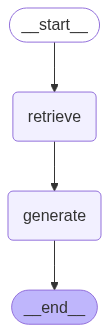

In [70]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [71]:
sequence_graph_builder = StateGraph(AgentState).add_sequence([retrieve, generate])

In [72]:
sequence_graph_builder.add_edge(START, 'retrieve')
sequence_graph_builder.add_edge('generate', END)

병렬처리나 conditional_edge가 없는 경우 add_sequence()를 통해 순차적으로 동작하는 그래프를 생성할 수 있음.

In [73]:
sequence_graph = sequence_graph_builder.compile()

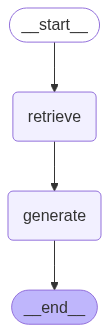

In [36]:
display(Image(sequence_graph.get_graph().draw_mermaid_png()))

In [37]:
initial_state = {'query': query}
graph.invoke(initial_state)

{'query': '연봉 1억원 직장인의 소득세는?',
 'context': [Document(metadata={'source': './documents/income_tax.txt'}, page_content='소득세법\n[시행 2025. 1. 1.] [법률 제20615호, 2024. 12. 31. 공포개정]\n기획재정부 (세제실세제과) 044-215-4312\n기획재정부 (소득세제과) 044-215-4216\n기획재정부 (운영지원과) 044-215-4233\n기획재정부 (소득세제과(사업소득, 기타소득)) 044-215-4217  \n제1장 총칙\n제1조(목적)\n이 법은 개인의 소득에 대하여 소득의 성격과 납세자의 부담능력 등에 따라 적정하고 공평한 조세부담의 형성을 도모하고 재정수입의 원활한 조달에 이바지함을 목적으로 한다.\n[본조신설 2009. 12. 31.]\n[종전 제1조는 제2조로 이동 <2009. 12. 31.>]\n제2조(정의)\n이 법에서 사용하는 용어의 뜻은 다음과 같다. <개정 2010. 12. 27, 2014. 12. 23, 2018. 12. 31.>\n1. “거주자”란 국내에 주소를 두거나 183일 이상 거소를 둔 개인을 말한다.\n2. “비거주자”란 거주자가 아닌 개인을 말한다.\n3. “국내사업자”란 법인세법 제2조제1호에 따른 내국법인을 말한다.\n4. “외국법인”이란 법인세법 제2조제3호에 따른 외국법인을 말한다.\n5. “사업자”란 사업소득이 있는 거주자를 말한다.\n6. 제1항에 따른 소득·기타소득·비거주자의 구분은 대통령령으로 정한다.\n[본조신설 2009. 12. 31.]\n제3조(납세의무)\n다음 각 호의 어느 하나에 해당하는 개인은 이 법에 따라 각자의 소득에 대한 소득세를 납부할 의무를 진다.\n1. 거주자\n2. 비거주자\n3. 국내사업자\n4. 외국법인이 국내에 사업장을(출처소, 그 밖에 이에 준하는 것을 포함한다. 이하 같다) 두고 있는 경우에 해당하는 원천징수의무자\n5. 그 밖에 이 법에 의해 정하는 원천징

'해당 문서에는 연봉 1억원인 직장인의 정확한 소득세 금액에 대한 정보가 포함되어 있지 않습니다' 라고 되어있잖아.

사용자 질문이 애매할 때, 리트리버 효율을 높이기 위해 질문을 중간에서 가공(릴레이/리프레이즈)한 뒤 다시 검색하는 로직을 그래프 단계로 만들자!!